# Example - Assessing home values in West Roxbury

### Introduction

In the US, assessed valuation determines the value of a residence for tax purposes. The **assessed value** is the price placed on a home by the corresponding government municipality, in order to calculate property taxes. So a model predicting the current assessed value from available, objective data could be useful for **automatic assessment** and for spotting assessment errors. Although, in general, the assessed value tends to be lower than the appraised fair market value of property, the **predictive model** could also provide rough estimates for the mortgage industry.

The objective of this example is to develop a **linear regression model** for predicting home assessed values in the West Roxbury neighborhood, in southwest Boston (Massachussets). The data include information on 5,801 single family owner-occupied homes.

### The data set

The data set (file `roxbury.csv`) contains 12 home features plus the total assessed value of the property. The variables included are:

* `value`, the total assesed value for property, in thousands of USD.

* `lot_sqft`, the total lot size of parcel in square feet.

* `yr_built`, the year the property was built.

* `gross_area`, the gross floor area.

* `living_area`, the total living area.

* `floors`, the number of floors.

* `rooms`, the number of rooms.

* `bedrooms`, the number of bedrooms.

* `full_bath`, the number of full baths.

* `half_bath`, the number of half baths.

* `kitchen`, the number of kitchens.

* `fireplace`, the number of fireplaces.

* `remodel`, a dummy for remodeled houses.

*Source*. G Shmueli, PC Bruce, I Yahav, NR Patel & KC Lichtendahl (2018), *Data Mining for Business Analytics*, Wiley (slightly edited).

### Importing the data

I import the data to a NumPy **structured array**. First, I load the NumPy library as usual:

In [1]:
import numpy as np

I capture the directly from a remote file in a GitHub repository. So, the filename is the URL for that file, composed of the **remote path** plus the name `roxbury.csv` given in the description of the data:

In [2]:
path = 'https://raw.githubusercontent.com/cinnData/MLearning/main/5.%20Linear%20regression/'
fname = path + 'roxbury.csv'

Now, I can use the function `genfromcsv` to import the data:

In [3]:
data = np.genfromtxt(fname, delimiter=',', names=True, dtype=None, encoding='utf-8')

Let me checking the shape and the content of first rows of `data`:

In [4]:
data.shape

(5801,)

In [5]:
data[:5]

array([(344.2,  9965, 1880, 2436, 1352, 2.,  6, 3, 1, 1, 1, 0, 0),
       (412.6,  6590, 1945, 3108, 1976, 2., 10, 4, 2, 1, 1, 0, 1),
       (330.1,  7500, 1890, 2294, 1371, 2.,  8, 4, 1, 1, 1, 0, 0),
       (498.6, 13773, 1957, 5032, 2608, 1.,  9, 5, 1, 1, 1, 1, 0),
       (331.5,  5000, 1910, 2370, 1438, 2.,  7, 3, 2, 0, 1, 0, 0)],
      dtype=[('value', '<f8'), ('lot_sqft', '<i8'), ('yr_built', '<i8'), ('gross_area', '<i8'), ('living_area', '<i8'), ('floors', '<f8'), ('rooms', '<i8'), ('bedrooms', '<i8'), ('full_bath', '<i8'), ('half_bath', '<i8'), ('kitchen', '<i8'), ('fireplace', '<i8'), ('remodel', '<i8')])

Everything looks right. Note that `floors` takes data type `float`, because the number of floors comes with decimals in the CSV file:

In [6]:
np.unique(data['floors'])

array([1. , 1.5, 2. , 2.5, 3. ])

### Target vector and feature matrix

This is **supervised learning**, so I have to specify the **target vector**:

In [7]:
y = data['value']

Now the **feature matrix**. To avoid writing the names of the columns, I extract them from:

In [8]:
data.dtype.names

('value',
 'lot_sqft',
 'yr_built',
 'gross_area',
 'living_area',
 'floors',
 'rooms',
 'bedrooms',
 'full_bath',
 'half_bath',
 'kitchen',
 'fireplace',
 'remodel')

Note that this is a **tuple**. Since I need a list to specify the columns to be retained, I turn it into a list. Then, I will get the feature matrix as structured subarray by excluding the first column (`value`):

In [9]:
X = data[list(data.dtype.names[1:])]

Finally, to get this matrix admitted by scikit-learn, it has to be converted to an **unstructured array**: 

In [10]:
from numpy.lib.recfunctions import structured_to_unstructured
X = structured_to_unstructured(X)

Let me check that `X` has the right shape:

In [11]:
X.shape

(5801, 12)

### Linear regression equation

To obtain the linear regression model, I import `LinearRegression` from the scikit-learn subpackage `linear_model`:

In [12]:
from sklearn.linear_model import LinearRegression

In a second step, I instantiate a **linear regression estimator**, calling it `linreg` (you can give it any name):

In [13]:
linreg = LinearRegression()

The three basic methods, `fit`, `score` and `predict`, work as follows. With the method `fit`, I get the regression coefficients (not shown unless you ask for them). These coefficients are optimal in the least squares sense. 

In [14]:
linreg.fit(X, y)

LinearRegression()

We typically use the **R2 statistic** to evaluate a regression model. It is given by the method `score`:

In [15]:
round(linreg.score(X, y), 3)

0.811

### Predicted values

The values predicted by the regression equation are given by the method `predict`:

In [16]:
ypred = linreg.predict(X)

The R2 statistic coincides with the correlation of the actual values and the predicted values. To get this correlation in NumPy, I use the function `corrcoef`, which returns a **correlation matrix**, as a 2d array. The term of this matrix on which we are interested can be selected as usual in NumPy:

In [17]:
r = np.corrcoef(y, ypred)[0,1]
round(r**2, 3)

0.811

### Scatter plot

The correlation provides a "quick and dirty" evaluation of a regression model. Nevertheless, a high correlation should not stop you from taking a closer look at the performance of the model. For instance, a **scatter plot** of the actual and the predicted home values frequently helps to get a more complete picture. That scatter plot (Figure 1) can be obtained as follows. First, I load the `pyplot` subpackage from `matplotlib`:

In [18]:
from matplotlib import pyplot as plt

Now I specify the scatter plot, placing the predicted values in the horizontal axis and the actual values in the vertical axis:

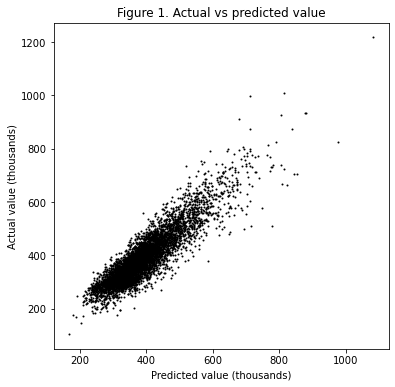

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(x=ypred, y=y, color='black', s=1)
plt.title('Figure 1. Actual vs predicted value')
plt.xlabel('Predicted value (thousands)')
plt.ylabel('Actual value (thousands)');

Figure 1 shows a few scattered points on both sides, those on the right side at higher distances. You should attentive to this, since extreme values can be affect the correlation, which may then suggest that the predictions are better than they really are. Let us explore this a bit more.

### Distribution of the home assessed values

**Skewed distributions** always make trouble in statistical analysis. The histogram of Figure 2 illustrates the distribution of the assessed value in West Roxbury, which is, indeed, skewed to the right. This is typical in distributions that are the consequence of the distribution of money across people.

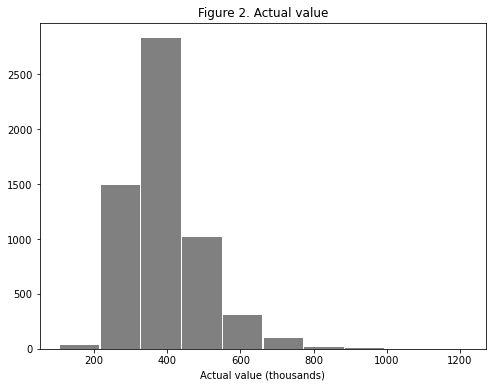

In [20]:
plt.figure(figsize=(8,6))
plt.title('Figure 2. Actual value')
plt.hist(y, color='gray', rwidth=0.97)
plt.xlabel('Actual value (thousands)');

### Trimmed data

We know that nothing is linear in the real world, but, still, we use linear equations in statistical analysis because of their simplicity, and because we also know than they provide good approximations if we restrict enough the range of some critical variables. In this case, restricting the range of the data also makes sense from the business point of view. In the real estate industry, models for customer segments are better trusted than "universal" models.

So, what if we trim the data set, keeping only those homes within a restricted value range? For this example, I am going to use the range from 250 to 500 thousand dollars. These limits are based on visual inspection of the above graphics, so you may have a better idea.

To obtain the trimmed data set, I create a **Boolean mask** by means of the expression `(y >= 250) & (y <= 500)`, placing it between the square brackets. 

In [21]:
y_trim = y[(y >= 250) & (y <= 500)]
X_trim = X[(y >= 250) & (y <= 500)]

Now, I extract the new regression equation and calculate the predicted values, as I did for the complete data set:

In [22]:
linreg.fit(X_trim, y_trim)
ypred_trim = linreg.predict(X_trim)

The new scatter plot is:

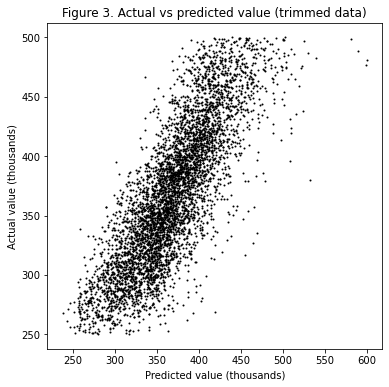

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(ypred_trim, y_trim, color='black', s=1)
plt.title('Figure 3. Actual vs predicted value (trimmed data)')
plt.xlabel('Predicted value (thousands)')
plt.ylabel('Actual value (thousands)');

Now the R2 statistic does not look so impressive:

In [24]:
round(linreg.score(X_trim, y_trim), 3)

0.647

What do we conclude from this? That the former correlation (above 0.9) was giving us an over-optimistic message about our ability to predict the assessed values with a linear regression model. On should not trust too much a correlation derived from data in which the target variable has a skewed distribution.

### Homework

1. Evaluate the predictive performance of these models in dollar terms. A statement in this line would be like "the value of `x`% of the houses can be predicted with an error below `y` thousand dollars".

2. Would it better to evaluate the models expressing the prediction errors in percentage terms? Then our statement would be like "the value of `x`% of the houses can be predicted with an error below `y`% of the actual value".

3. Which of the two models predicts better than the house values between 250 and 500 thousand dollars?